<a href="https://colab.research.google.com/github/yshan9/deep_learning/blob/master/Consumer%20Complaints%20Text%20Classification%20With%20CNN%20and%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/Users/yuyingshan/Downloads/26k-consumer-complaints.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28156 entries, 0 to 28155
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            28156 non-null  int64  
 1   Complaint ID          28156 non-null  int64  
 2   Product               28156 non-null  object 
 3   Sub-product           17582 non-null  object 
 4   Issue                 28154 non-null  object 
 5   Sub-issue             13211 non-null  object 
 6   State                 27735 non-null  object 
 7   ZIP code              27876 non-null  float64
 8   Date received         28156 non-null  object 
 9   Date sent to company  28156 non-null  object 
 10  Company               28156 non-null  object 
 11  Company response      28156 non-null  object 
 12  Timely response?      28156 non-null  object 
 13  Consumer disputed?    6006 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 3.0+ MB


In [ ]:
df.Product.value_counts()

Debt collection            7494
Mortgage                   6612
Credit reporting           5717
Credit card                2830
Bank account or service    2609
Consumer loan              1314
Student loan                785
Payday loan                 348
Money transfers             232
Prepaid card                175
Other financial service      40
Name: Product, dtype: int64

In [ ]:
df.isnull().values.any()

df.shape

(28156, 14)

In [ ]:
df.head()

,Unnamed: 0,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,0,1291006,Debt collection,NaN,Communication tactics,Frequent or repeated calls,TX,76119.0,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,NaN
1,1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479.0,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,NaN
2,2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,MA,2127.0,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes
3,3,1291615,Credit card,NaN,Other,NaN,CA,92592.0,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,NaN
4,4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,NaN,43068.0,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,NaN


# Label Consolidation

In [ ]:
# Label Consolidation

df.loc[df['Product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df.loc[df['Product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
df.loc[df['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
df.loc[df['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'
df = df[df.Product != 'Other financial service']

In [ ]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
df['Product'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Complaints', 
                                                                title='Number complaints in each product')

# Text Pre-processing

In [ ]:
# Text Pre-processing

def print_plot(index):
    example = df[df.index == index][['Issue', 'Product']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Product:', example[1])
print_plot(10)

False statements or representation
Product: Debt collection


In [ ]:
print_plot(100)

Communication tactics
Product: Debt collection


In [ ]:
import re
from nltk.corpus import stopwords

In [ ]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(clean_text)
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].str.replace('\d+', '')

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/yuyingshan/nltk_data'
    - '/Users/yuyingshan/opt/anaconda3/envs/AntonioEnv/nltk_data'
    - '/Users/yuyingshan/opt/anaconda3/envs/AntonioEnv/share/nltk_data'
    - '/Users/yuyingshan/opt/anaconda3/envs/AntonioEnv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


# Embedding

In [ ]:
# Modeling /Embedding 

from keras.preprocessing.text import Tokenizer
df=df.astype(str)


Using TensorFlow backend.


In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Issue'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 183 unique tokens.


In [ ]:
import tensorflow as tf
import keras

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
X = tokenizer.texts_to_sequences(df['Issue'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (28116, 250)


In [ ]:
Y = pd.get_dummies(df['Product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (28116, 10)


In [ ]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(25304, 250) (25304, 10)
(2812, 250) (2812, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, SpatialDropout1D
from keras.callbacks import EarlyStopping

# Text Classification with a Convolutional Neural Network

In [ ]:
from keras.layers.convolutional import Conv1D  
from keras.layers import GlobalMaxPooling1D

In [ ]:
model = Sequential()

model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))

model.add(SpatialDropout1D(0.2))

model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

/Users/yuyingshan/opt/anaconda3/envs/AntonioEnv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Train on 22773 samples, validate on 2531 samples
Epoch 1/5
22773/22773 [==============================] - 29s 1ms/step - loss: 0.7625 - accuracy: 0.9124 - val_loss: 0.1332 - val_accuracy: 0.9727
Epoch 2/5
22773/22773 [==============================] - 28s 1ms/step - loss: 0.0697 - accuracy: 0.9881 - val_loss: 0.0430 - val_accuracy: 0.9949
Epoch 3/5
22773/22773 [==============================] - 28s 1ms/step - loss: 0.0287 - accuracy: 0.9950 - val_loss: 0.0239 - val_accuracy: 0.9949
Epoch 4/5
22773/22773 [==============================] - 28s 1ms/step - loss: 0.0193 - accuracy: 0.9953 - val_loss: 0.0199 - val_accuracy: 0.9949
Epoch 5/5
22773/22773 [==============================] - 27s 1ms/step - loss: 0.0162 - accuracy: 0.9953 - val_loss: 0.0184 - val_accuracy: 0.9949


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2812/2812 [==============================] - 0s 35us/step
Test set
  Loss: 0.018
  Accuracy: 0.994


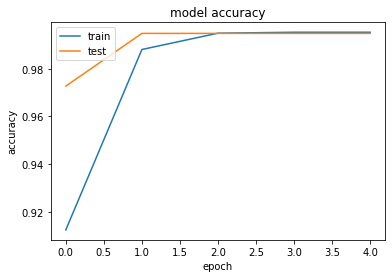

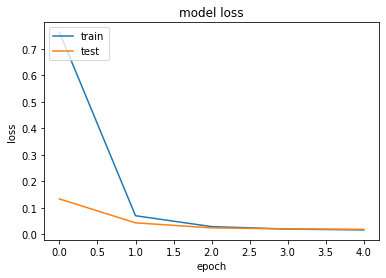

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Text Classification with Recurrent Neural Network (LSTM)

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])



/Users/yuyingshan/opt/anaconda3/envs/AntonioEnv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Train on 22773 samples, validate on 2531 samples
Epoch 1/5
22773/22773 [==============================] - 495s 22ms/step - loss: 0.3887 - accuracy: 0.8933 - val_loss: 0.0418 - val_accuracy: 0.9885
Epoch 2/5
22773/22773 [==============================] - 419s 18ms/step - loss: 0.0271 - accuracy: 0.9939 - val_loss: 0.0220 - val_accuracy: 0.9893
Epoch 3/5
22773/22773 [==============================] - 350s 15ms/step - loss: 0.0192 - accuracy: 0.9944 - val_loss: 0.0215 - val_accuracy: 0.9893
Epoch 4/5
22773/22773 [==============================] - 359s 16ms/step - loss: 0.0157 - accuracy: 0.9946 - val_loss: 0.0193 - val_accuracy: 0.9949
Epoch 5/5
22773/22773 [==============================] - 361s 16ms/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.0173 - val_accuracy: 0.9949


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2812/2812 [==============================] - 19s 7ms/step
Test set
  Loss: 0.017
  Accuracy: 0.994


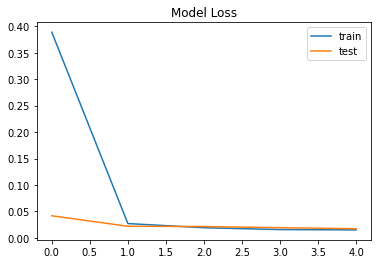

In [ ]:
plt.title('Model Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

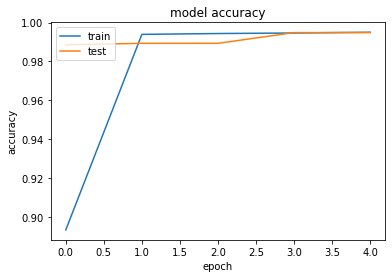

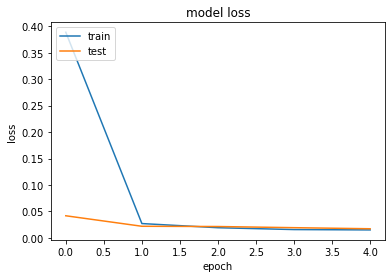

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


# Making Predictions on Single Instance